## Import Modules

In [1]:
import numpy as np
import pandas as pd
import scipy
from math import sqrt
import matplotlib.pyplot as plt
import seaborn as sns

#estimators
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import linear_model

#model metrics

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

#cross validation
from sklearn.cross_validation import train_test_split
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
#data
rawData = pd.read_excel('W4 Q319.xlsx', header=0)

rawData['FinalStatus'] = rawData['FinalStatus'] .astype('category')
rawData.head()

,Opportunity_ID,Fiscal_Period,ForecastCategoryName,Status,War_Room_Status,WR_Status_for_RTP,Opportunity_Driver,OpptyAge,StageName,Amount,AmountNoChng,CloseDateNoChng,ForecastStatusNoChng,StageNameNoChng,eValuePrompterNoChng,NextStepsNoChng,FinalStatus
0,1,Q4-2019,Upside,NaN,NaN,Upside,AE,37.0,02 - Qualified,0.87,0,0,2,0,1,1,3
1,2,Q1-2020,Upside,NaN,NaN,Upside,AE,551.0,02 - Qualified,4944382.00,32,6,3,3,1,13,3
2,3,Q3-2019,Probable,NaN,Forecast,Forecast,AE - SP EU,143.0,05 - Prove,8050622.00,12,6,1,3,1,45,3
3,4,Q3-2019,Upside,NaN,NaN,Upside,AE - SP NS,295.0,04 - Design,1.00,3,0,0,0,0,1,3
4,5,Q3-2019,Probable,NaN,NaN,Probable,IS,39.0,05 - Prove,12645.22,3,1,1,1,0,2,3


In [3]:
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40771 entries, 0 to 40770
Data columns (total 17 columns):
Opportunity_ID          40771 non-null int64
Fiscal_Period           40771 non-null object
ForecastCategoryName    40771 non-null object
Status                  0 non-null float64
War_Room_Status         1419 non-null object
WR_Status_for_RTP       40771 non-null object
Opportunity_Driver      29221 non-null object
OpptyAge                40770 non-null float64
StageName               40771 non-null object
Amount                  39879 non-null float64
AmountNoChng            40771 non-null int64
CloseDateNoChng         40771 non-null int64
ForecastStatusNoChng    40771 non-null int64
StageNameNoChng         40771 non-null int64
eValuePrompterNoChng    40771 non-null int64
NextStepsNoChng         40771 non-null int64
FinalStatus             40771 non-null category
dtypes: category(1), float64(3), int64(7), object(6)
memory usage: 5.0+ MB


## Features / variables definition

In [4]:
#features
features = rawData.iloc[:,10:16]
print('Summary of feature sample')
features.head()

Summary of feature sample


,AmountNoChng,CloseDateNoChng,ForecastStatusNoChng,StageNameNoChng,eValuePrompterNoChng,NextStepsNoChng
0,0,0,2,0,1,1
1,32,6,3,3,1,13
2,12,6,1,3,1,45
3,3,0,0,0,0,1
4,3,1,1,1,0,2


In [5]:
#dependent variable
depVar = rawData['FinalStatus']

In [6]:
#Training Set (Feature Space: X Training)
X_train = (features[: 30000])
X_train.head()

,AmountNoChng,CloseDateNoChng,ForecastStatusNoChng,StageNameNoChng,eValuePrompterNoChng,NextStepsNoChng
0,0,0,2,0,1,1
1,32,6,3,3,1,13
2,12,6,1,3,1,45
3,3,0,0,0,0,1
4,3,1,1,1,0,2


In [7]:
#Dependent Variable Training Set (y Training)
y_train = depVar[: 30000]
y_train_count = len(y_train.index)
print('The number of observations in the Y training set are:',str(y_train_count))
y_train.head()

The number of observations in the Y training set are: 30000


0    3
1    3
2    3
3    3
4    3
Name: FinalStatus, dtype: category
Categories (3, int64): [0, 1, 3]

In [8]:
#Testing Set (X Testing)
X_test = features[-10000:]
X_test_count = len(X_test.index)
print('The number of observations in the feature testing set is:',str(X_test_count))
print(X_test.head())

The number of observations in the feature testing set is: 10000
       AmountNoChng  CloseDateNoChng  ForecastStatusNoChng  StageNameNoChng  \
30771             1                0                     0                2   
30772             2                4                     2                1   
30773             1                1                     0                0   
30774             1                1                     0                1   
30775             0                1                     0                0   

       eValuePrompterNoChng  NextStepsNoChng  
30771                     0                2  
30772                     0                4  
30773                     0                0  
30774                     0                0  
30775                     0                0  


In [9]:
#Ground Truth (y_test) 
y_test = depVar[-10000:]
y_test_count = len(y_test.index)
print('The number of observations in the Y training set are:',str(y_test_count))
y_test.head()

The number of observations in the Y training set are: 10000


30771    3
30772    3
30773    3
30774    3
30775    3
Name: FinalStatus, dtype: category
Categories (3, int64): [0, 1, 3]

### Feature selection using PCA

In [10]:
#BACKUP of Original Features
X_train_orig = X_train
X_test_orig = X_test
y_train_orig = y_train
y_test_orig = y_test

In [11]:
# Feature Engineering using PCA
pca = PCA(.95)
pca.fit(X_train)
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)
X_train

array([[-3.90279736e+00, -1.28560636e+00,  6.34318074e-01],
       [ 2.09973151e+01,  2.29621843e+01,  1.72104282e+00],
       [ 4.06963705e+01, -8.36207744e+00,  9.23915062e+00],
       ...,
       [ 1.59831014e+00,  1.05844140e+00, -2.10526381e+00],
       [-4.30296156e+00, -7.36839592e-02, -3.95610150e-02],
       [-2.95117269e+00,  1.36965654e+00,  1.37472885e+00]])

## Cross Validation

In [12]:
from sklearn.cross_validation import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train)

In [14]:
X_train.shape, X_test.shape

((22500, 3), (7500, 3))

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train)
X_train.shape, X_test.shape

((16875, 3), (5625, 3))

## Building Models and choosing the right Model

### Establish variables that you will use for defining each model, and defining Tunning Parameters

In [16]:
#Models
modelSVC = SVC(gamma='auto')
modelNN = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
modelLR = LogisticRegression(random_state=0, solver='sag',max_iter=5000)

### Establish a variable specifically for your features

In [17]:
#features
features = rawData.iloc[:,10:17]
print('Summary of feature sample')
features.head()

Summary of feature sample


,AmountNoChng,CloseDateNoChng,ForecastStatusNoChng,StageNameNoChng,eValuePrompterNoChng,NextStepsNoChng,FinalStatus
0,0,0,2,0,1,1,3
1,32,6,3,3,1,13,3
2,12,6,1,3,1,45,3
3,3,0,0,0,0,1,3
4,3,1,1,1,0,2,3


### Validate that the correct column is being used for the dependent variable:

In [18]:
#dependent variable
print(depVar)

0        3
1        3
2        3
3        3
4        3
5        3
6        3
7        3
8        1
9        3
10       3
11       3
12       3
13       3
14       3
15       3
16       3
17       3
18       3
19       3
20       3
21       3
22       3
23       3
24       3
25       3
26       3
27       3
28       3
29       3
        ..
40741    3
40742    3
40743    3
40744    3
40745    3
40746    3
40747    3
40748    3
40749    3
40750    3
40751    3
40752    3
40753    3
40754    3
40755    3
40756    3
40757    3
40758    3
40759    3
40760    3
40761    3
40762    3
40763    3
40764    3
40765    3
40766    3
40767    3
40768    3
40769    3
40770    3
Name: FinalStatus, Length: 40771, dtype: category
Categories (3, int64): [0, 1, 3]


In [19]:
Correlation = rawData.corr()
print(Correlation)

                      Opportunity_ID  Status  OpptyAge    Amount  \
Opportunity_ID              1.000000     NaN -0.005517 -0.008563   
Status                           NaN     NaN       NaN       NaN   
OpptyAge                   -0.005517     NaN  1.000000  0.095745   
Amount                     -0.008563     NaN  0.095745  1.000000   
AmountNoChng               -0.003380     NaN  0.309986  0.177294   
CloseDateNoChng            -0.004457     NaN  0.576819  0.027357   
ForecastStatusNoChng       -0.000700     NaN  0.220756  0.038114   
StageNameNoChng            -0.000114     NaN  0.344291  0.006162   
eValuePrompterNoChng       -0.004676     NaN  0.190929  0.123993   
NextStepsNoChng            -0.014843     NaN  0.372549  0.054766   

                      AmountNoChng  CloseDateNoChng  ForecastStatusNoChng  \
Opportunity_ID           -0.003380        -0.004457             -0.000700   
Status                         NaN              NaN                   NaN   
OpptyAge            

In [20]:
Covariance = rawData.cov()
print(Covariance)

                      Opportunity_ID  Status      OpptyAge        Amount  \
Opportunity_ID          1.385263e+08     NaN -1.099904e+04 -1.093337e+08   
Status                           NaN     NaN           NaN           NaN   
OpptyAge               -1.099904e+04     NaN  2.869503e+04  1.742162e+07   
Amount                 -1.093337e+08     NaN  1.742162e+07  1.173952e+12   
AmountNoChng           -1.624433e+02     NaN  2.144307e+02  7.892729e+05   
CloseDateNoChng        -1.393417e+02     NaN  2.595423e+02  7.922076e+04   
ForecastStatusNoChng   -9.817120e+00     NaN  4.457878e+01  4.966662e+04   
StageNameNoChng        -1.858499e+00     NaN  8.073831e+01  9.305864e+03   
eValuePrompterNoChng   -1.528820e+01     NaN  8.983955e+00  3.770528e+04   
NextStepsNoChng        -1.072500e+03     NaN  3.874116e+02  3.669666e+05   

                       AmountNoChng  CloseDateNoChng  ForecastStatusNoChng  \
Opportunity_ID          -162.443341      -139.341722             -9.817120   
Status 

### Use the model variables you established in step 2  pass the training data to them in the following format

### Neural Networks

In [21]:
modelNN.fit(X_train,y_train)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(5, 2), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

### Support Vector Classification

In [22]:
modelSVC.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

### Logistic Regression

In [23]:
modelLR.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=5000, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='sag', tol=0.0001,
          verbose=0, warm_start=False)

## Choosing the Right Model

In [24]:
from sklearn.model_selection import cross_val_score

In [25]:
print(cross_val_score(modelNN, X_train, y_train)) 

[0.96568889 0.96568889 0.96568889]


### 1. Neural Networks Classifier Model Fitting and Scoring

In [26]:
#Model Fitting
modelNN.fit(X_train,y_train)
print(cross_val_score(modelNN, X_train, y_train))
modelNN.score(X_train,y_train)

[0.96568889 0.96568889 0.96568889]


0.9656888888888889

### 2. C-Support Vector Classification Model Fitting and Scoring

In [27]:
modelSVC.fit(X_train,y_train)
print(cross_val_score(modelSVC, X_train, y_train)) 
modelSVC.score(X_train,y_train)

[0.96533333 0.96568889 0.96515556]


0.9704296296296296

### 3. Logistic Regression Model Fitting and Scoring

In [28]:
modelLR.fit(X_train,y_train)
print(cross_val_score(modelLR, X_train, y_train)) 
modelLR.score(X_train,y_train)

[0.96497778 0.96462222 0.96586667]


0.9654518518518519

## Evaluating the Results

### Make Predictions

In [29]:
#Neural Network Prediction
predictionNN = modelNN.predict(X_test)

y_predNN = predictionNN
y_trueNN = y_test
accuracy_score(y_trueNN, y_predNN)

0.9658666666666667

In [30]:
confusion_matrix(y_trueNN, y_predNN)

array([[   0,    0,  109],
       [   0,    0,   83],
       [   0,    0, 5433]], dtype=int64)

In [31]:
#Support Vector Classification
predictionSVC = modelSVC.predict(X_test)

y_predSVC = predictionSVC
y_trueSVC = y_test
accuracy_score(y_trueSVC, y_predSVC)

0.9658666666666667

In [32]:
rawData['predictionSVC'] = pd.Series(y_predSVC)

In [33]:
print(rawData)

       Opportunity_ID Fiscal_Period ForecastCategoryName  Status  \
0                   1       Q4-2019               Upside     NaN   
1                   2       Q1-2020               Upside     NaN   
2                   3       Q3-2019             Probable     NaN   
3                   4       Q3-2019               Upside     NaN   
4                   5       Q3-2019             Probable     NaN   
5                   6       Q3-2019               Upside     NaN   
6                   7       Q3-2019               Upside     NaN   
7                   8       Q4-2019               Upside     NaN   
8                   9       Q3-2019             Forecast     NaN   
9                  10       Q3-2019               Upside     NaN   
10                 11       Q3-2019               Upside     NaN   
11                 12       Q3-2019               Upside     NaN   
12                 13       Q3-2019               Upside     NaN   
13                 14       Q4-2019             

In [34]:
rawData.to_excel('predictedSVC.xlsx')

In [35]:
##X_test['predictionSVC'] = predictionSVC

In [36]:
conf_matrixSVC = confusion_matrix(y_trueSVC, y_predSVC)

In [37]:
print(conf_matrixSVC)

[[   0    0  109]
 [   0    0   83]
 [   0    0 5433]]


In [38]:
print(y_predSVC)

[3 3 3 ... 3 3 3]


In [39]:
#Logistic Regression
predictionLR = modelLR.predict(X_test)

y_predLR = predictionLR
y_trueLR = y_test
accuracy_score(y_trueLR, y_predLR)

0.9648

In [40]:
confusion_matrix(y_trueLR, y_predLR)

array([[   5,    0,  104],
       [   1,    0,   82],
       [  11,    0, 5422]], dtype=int64)

###  Plotting the Results

### Neural Network Plot

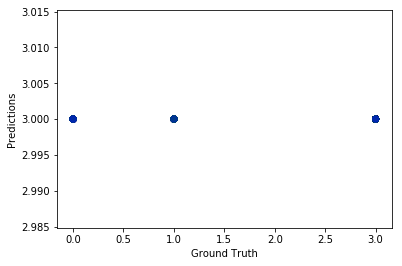

In [41]:
plt.scatter(y_test, predictionNN, color=['blue','green'], alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();

### Support Vector Classification Plot

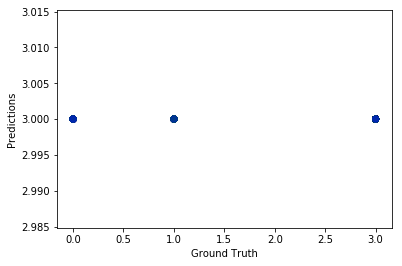

In [42]:
plt.scatter(y_test, predictionSVC, color=['blue','green'], alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();

### Logistic Regression Plot

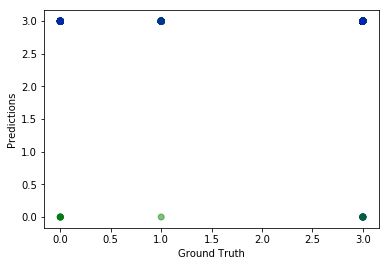

In [43]:
plt.scatter(y_test, predictionLR, color=['blue','green'], alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();